# Convolution 4 layer network

This notebook uses a 4 layer convolution network built using the Keras [sequential model](https://keras.io/getting-started/sequential-model-guide/) to classify images in the 
[CIFAR-10 ](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [1]:
import os
# uncomment the following line to run only on CPU
# restart the Jupyter notebook before each change
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# 1 minutes 52 seconds for 5 epochs on GPU
# 20 minutes 38 seconds for 5 epochs on CPU

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
import pandas as pd

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from keras import backend as K
K.image_data_format()

'channels_last'

Loading the CIFAR-10 dataset training and test images

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('There are {} training images each of size {}.'.format(
    x_train.shape[0], x_train.shape[1:3]))

print('There are {} test images.'.format(x_test.shape[0]))

There are 50000 training images each of size (32, 32).
There are 10000 test images.


The images are divided into 10 non-overlapping categories

In [5]:
cifar10_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

Matplotlib is used to plot the first 10 images

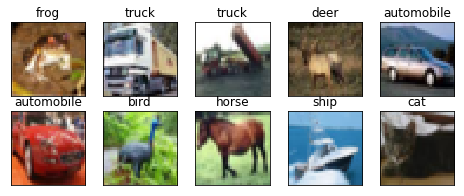

In [6]:
def plot_image(img, title, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img)
    ax.set_title(title)
    
nrows = 2
ncols = 5
fig, ax_list = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(w=8, h=3)
for id_x in range(nrows):
    for id_y in range(ncols):
        id_loc = id_x * ncols + id_y
        plot_image(x_train[id_loc], cifar10_names[y_train[id_loc][0]],
                   ax_list[id_x, id_y])

Display the devices available for Tensorflow & Keras

In [7]:
from tensorflow.python.client import device_lib
for item in device_lib.list_local_devices():
    print('name: {}, memory {}'.format(item.name, item.memory_limit))

name: /device:CPU:0, memory 268435456
name: /device:GPU:0, memory 11324823962


In [7]:
num_classes = 10
batch_size = 32
epochs = 5 

# input image dimensions
(img_rows, img_cols) = x_train.shape[1:3]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [8]:
y_train_bin = keras.utils.to_categorical(y_train.squeeze(), num_classes)
y_test_bin = keras.utils.to_categorical(y_test.squeeze(), num_classes)

Create a Convolution model with four layers

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

In [12]:
%%timeit -n 1 -r 1
model.fit(x_train, y_train_bin, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test, y_test_bin))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 248s 5ms/step - loss: 1.8290 - acc: 0.3254 - val_loss: 1.5308 - val_acc: 0.4493
Epoch 2/5
50000/50000 [==============================] - 248s 5ms/step - loss: 1.4932 - acc: 0.4575 - val_loss: 1.4147 - val_acc: 0.4807
Epoch 3/5
50000/50000 [==============================] - 247s 5ms/step - loss: 1.3609 - acc: 0.5121 - val_loss: 1.2619 - val_acc: 0.5523
Epoch 4/5
50000/50000 [==============================] - 247s 5ms/step - loss: 1.2661 - acc: 0.5505 - val_loss: 1.1756 - val_acc: 0.5841
Epoch 5/5
50000/50000 [==============================] - 248s 5ms/step - loss: 1.1917 - acc: 0.5803 - val_loss: 1.1076 - val_acc: 0.6096
20min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Add confusion matrix
* https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Measuring performance
* https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
* https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/